# 라이브러리 불러오기

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 불러오기 (data_net)

In [4]:
data = pd.read_csv('/content/drive/MyDrive/데이터셋/통합데이터/21년_22년_567/data_net.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10262784 entries, 0 to 10262783
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   대여소번호   int64  
 1   시간      object 
 2   월       int64  
 3   요일      int64  
 4   시       int64  
 5   대여횟수    float64
 6   반납횟수    float64
 7   순대여량    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 626.4+ MB


In [6]:
data

,대여소번호,시간,월,요일,시,대여횟수,반납횟수,순대여량
0,102,2021-05-01 00:00:00,5,5,0,0.0,1.0,-1.0
1,102,2021-05-01 01:00:00,5,5,1,2.0,2.0,0.0
2,102,2021-05-01 02:00:00,5,5,2,1.0,0.0,1.0
3,102,2021-05-01 03:00:00,5,5,3,1.0,0.0,1.0
4,102,2021-05-01 04:00:00,5,5,4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10262779,4863,2022-07-31 19:00:00,7,6,19,0.0,1.0,-1.0
10262780,4863,2022-07-31 20:00:00,7,6,20,0.0,0.0,0.0
10262781,4863,2022-07-31 21:00:00,7,6,21,0.0,0.0,0.0
10262782,4863,2022-07-31 22:00:00,7,6,22,0.0,0.0,0.0


## 시간 column ; datetime 타입으로 변환

In [7]:
data['시간'] = pd.to_datetime(data['시간'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10262784 entries, 0 to 10262783
Data columns (total 8 columns):
 #   Column  Dtype         
---  ------  -----         
 0   대여소번호   int64         
 1   시간      datetime64[ns]
 2   월       int64         
 3   요일      int64         
 4   시       int64         
 5   대여횟수    float64       
 6   반납횟수    float64       
 7   순대여량    float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 626.4 MB


# train, test split
21년: train
22년: test

In [9]:
train = data[data['시간'] < '2022-01-01']
test = data[data['시간'] > '2022-01-01']

In [10]:
train

,대여소번호,시간,월,요일,시,대여횟수,반납횟수,순대여량
0,102,2021-05-01 00:00:00,5,5,0,0.0,1.0,-1.0
1,102,2021-05-01 01:00:00,5,5,1,2.0,2.0,0.0
2,102,2021-05-01 02:00:00,5,5,2,1.0,0.0,1.0
3,102,2021-05-01 03:00:00,5,5,3,1.0,0.0,1.0
4,102,2021-05-01 04:00:00,5,5,4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10260571,4863,2021-07-31 19:00:00,7,5,19,0.0,0.0,0.0
10260572,4863,2021-07-31 20:00:00,7,5,20,0.0,0.0,0.0
10260573,4863,2021-07-31 21:00:00,7,5,21,2.0,0.0,2.0
10260574,4863,2021-07-31 22:00:00,7,5,22,0.0,1.0,-1.0


In [11]:
test

,대여소번호,시간,월,요일,시,대여횟수,반납횟수,순대여량
2208,102,2022-05-01 00:00:00,5,6,0,6.0,6.0,0.0
2209,102,2022-05-01 01:00:00,5,6,1,4.0,4.0,0.0
2210,102,2022-05-01 02:00:00,5,6,2,6.0,1.0,5.0
2211,102,2022-05-01 03:00:00,5,6,3,4.0,1.0,3.0
2212,102,2022-05-01 04:00:00,5,6,4,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...
10262779,4863,2022-07-31 19:00:00,7,6,19,0.0,1.0,-1.0
10262780,4863,2022-07-31 20:00:00,7,6,20,0.0,0.0,0.0
10262781,4863,2022-07-31 21:00:00,7,6,21,0.0,0.0,0.0
10262782,4863,2022-07-31 22:00:00,7,6,22,0.0,0.0,0.0


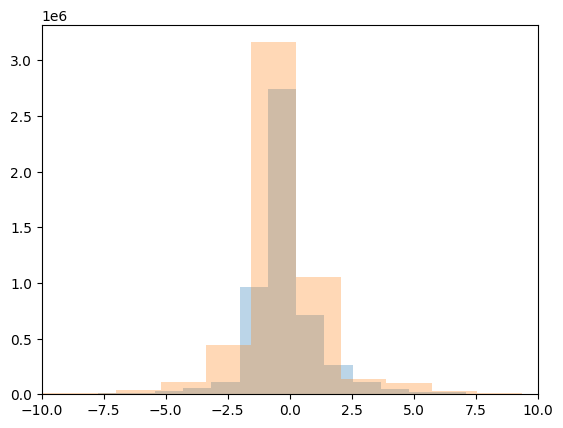

In [21]:
plt.hist(train['순대여량'], bins = 100, alpha = 0.3)
plt.hist(test['순대여량'], bins = 100, alpha = 0.3)
plt.xlim(-10, 10)
plt.show()

#csv 저장

In [22]:
train.to_csv('/content/drive/MyDrive/데이터셋/train test/train_data.csv', index = False)

In [23]:
test.to_csv('/content/drive/MyDrive/데이터셋/train test/test_data.csv', index = False)